In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import netCDF4 as nc
import datetime as dt
import cmocean
import string
import glob
import pickle
import matplotlib as mpl
from salishsea_tools import evaltools as et
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from scipy.ndimage import gaussian_filter
from matplotlib.ticker import FormatStrFormatter
from NorthNut import vvl_interp_T_to_V, vvl_interp_T_to_U;

%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


calculations have been moved to calcTranspsEstuarineExchange.py

In [2]:
fformat0='%Y%m%d'
mod_start=dt.datetime(2015,1,1)
mod_end=dt.datetime(2015,12,31)
savepath='../../save/transpLines'+mod_start.strftime(fformat0)+'-'+mod_end.strftime(fformat0)+'.pkl'

In [3]:
data=pickle.load(open(savepath,'rb'))
mod_start=data['mod_start']
mod_end=data['mod_end']
volT=data['volT']
no3T=data['no3T']
no3=data['no3']
masks=data['masks']
gdept_1d=data['gdept_1d']
e3t_1d=data['e3t_1d']
ulines=data['ulines']
vlines=data['vlines']

In [6]:
np.shape(no3T['Haro'])

(8760, 40, 33)

In [14]:
dt.datetime(2015,11,1)-dt.timedelta(days=1)

datetime.datetime(2015, 10, 31, 0, 0)

In [9]:
11955/3600*365/23

52.700181159420296

In [4]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])

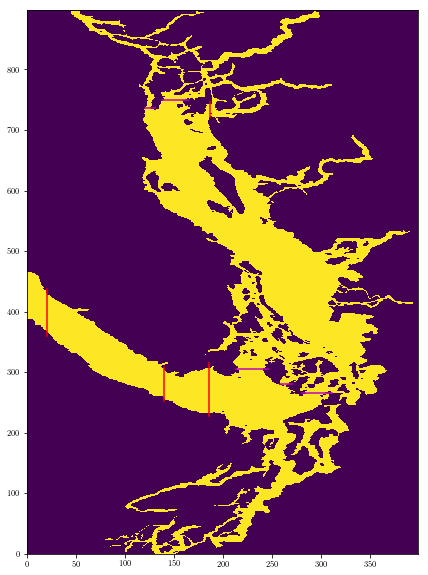

In [5]:
fig,ax=plt.subplots(1,1,figsize=(7,10))
ax.pcolormesh(umask[0,0,:,:])
for el in ulines.keys():
    ax.plot((ulines[el]['i'],ulines[el]['i']),(ulines[el]['j'][0],ulines[el]['j'][1]),'r-')
for el in vlines.keys():
    ax.plot((vlines[el]['i'][0],vlines[el]['i'][1]),(vlines[el]['j'],vlines[el]['j']),'m-')
#ax.plot((50,50),(325,408),'c-')
#ax.plot((100,100),(275,352),'c-')
#ax.plot((121,188),(791,791),'c-')
#ax.plot((140,140),(253,308),'w-')

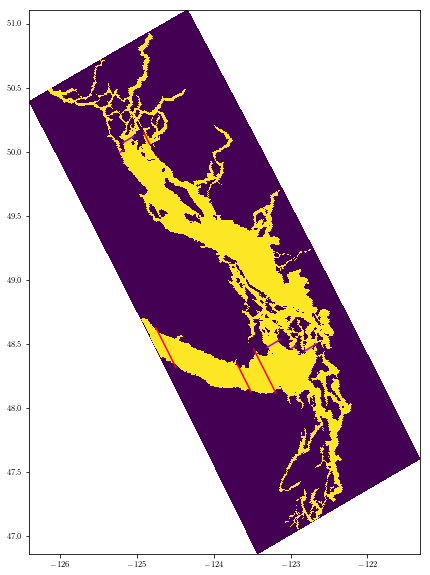

In [6]:
fig,ax=plt.subplots(1,1,figsize=(7,10))
ax.pcolormesh(navlon,navlat,umask[0,0,:,:])
for el in ulines.keys():
    #ax.plot((ulines[el]['i'],ulines[el]['i']),(ulines[el]['j'][0],ulines[el]['j'][1]),'r-')
    ax.plot((navlon[ulines[el]['j'][0],ulines[el]['i']],navlon[ulines[el]['j'][1],ulines[el]['i']]),
            (navlat[ulines[el]['j'][0],ulines[el]['i']],navlat[ulines[el]['j'][1],ulines[el]['i']]),'r-')
for el in vlines.keys():
    ax.plot((navlon[vlines[el]['j'],vlines[el]['i']][0],navlon[vlines[el]['j'],vlines[el]['i'][1]]),
            (navlat[vlines[el]['j'],vlines[el]['i']][0],navlat[vlines[el]['j'],vlines[el]['i'][1]]),'m-')

#ax.plot((navlon[250,143],navlon[305,143]),
#        (navlat[250,143],navlat[305,143]),'m-')
 
#ax.plot((50,50),(325,408),'c-')
#ax.plot((100,100),(275,352),'c-')
#ax.plot((121,188),(791,791),'c-')

In [7]:
e3t_1d

masked_array(data=[1.0000011545549246, 1.0000050146313075,
                   1.0000125330301763, 1.0000271768590778,
                   1.000055699095645, 1.0001112526466258,
                   1.0002194555057198, 1.0004302033056973,
                   1.00084067413683, 1.001640124846535,
                   1.0031971007156422, 1.0062291389536533,
                   1.012132707944847, 1.0236235758257202,
                   1.0459755093254142, 1.089400606637021,
                   1.1735642803318154, 1.3359289925405164,
                   1.6463678079268433, 2.229902849402567,
                   3.2924856660854385, 5.1199850823910555,
                   7.974515064757118, 11.82529720421952,
                   16.107920438013576, 19.95870257747598,
                   22.813232559842042, 24.640731976147656,
                   25.70331479283053, 26.286849834306253,
                   26.59728864969258, 26.75965336190128,
                   26.843817035596075, 26.88724213290768,
           

In [8]:
np.shape(no3T['Discovery'])

(8760, 40, 11)

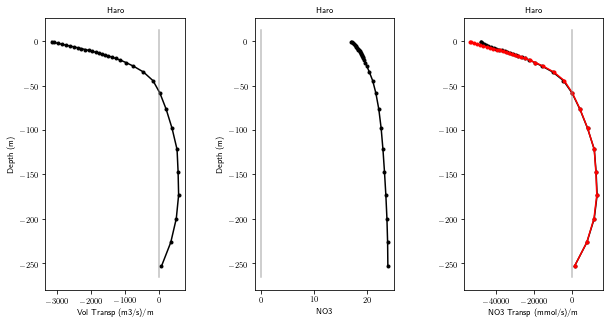

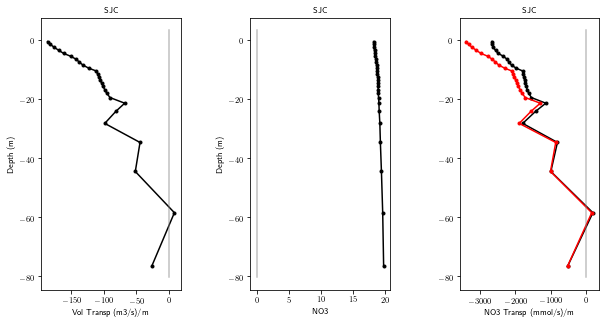

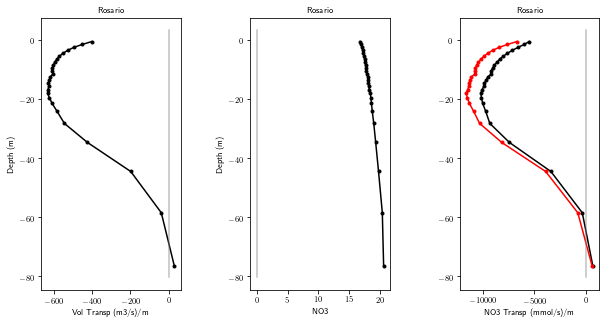

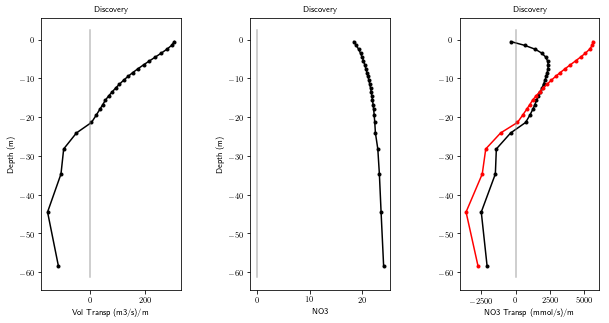

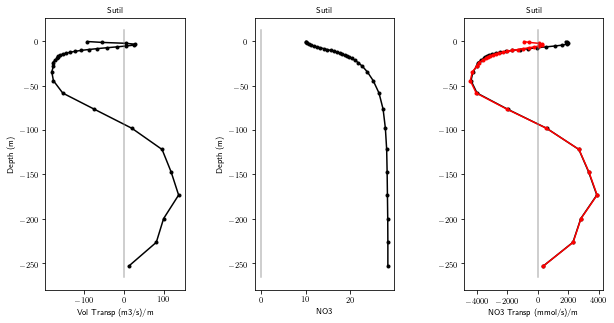

In [9]:
# plot 2015 transps, vlines
for ipath in vlines.keys():
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    fig,ax=plt.subplots(1,3,figsize=(10,5)); fig.subplots_adjust(wspace=.5)
    vmean=np.mean(np.sum(volT[ipath],2),0)
    nmean=np.mean(np.mean(np.ma.masked_where(imask==0,no3[ipath]),2),0)
    ax[0].plot(vmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[0].set_title(ipath); ax[0].set_xlabel('Vol Transp (m3/s)/m'); ax[0].set_ylabel('Depth (m)')
    yl=ax[0].get_ylim(); ax[0].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[0].set_ylim(-450,0)
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    ax[1].plot(nmean,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[1].set_title(ipath); ax[1].set_xlabel('NO3'); ax[1].set_ylabel('Depth (m)')
    ax[1].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)
    ax[2].plot(np.mean(np.sum(no3T[ipath],2),0)/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')#*1e-3*62.0049*1e-3
    ax[2].plot(vmean*nmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'r.-')
    ax[2].set_title(ipath); ax[2].set_xlabel('NO3 Transp (mmol/s)/m'); ax[1].set_ylabel('Depth (m)')
    ax[2].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)

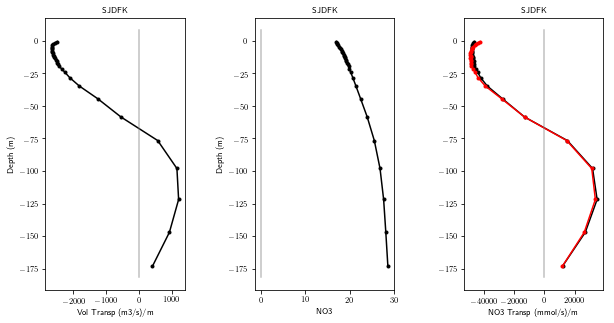

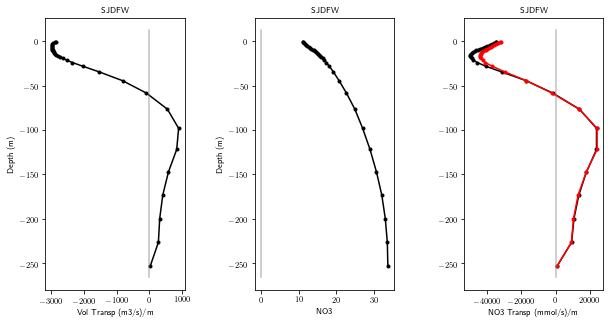

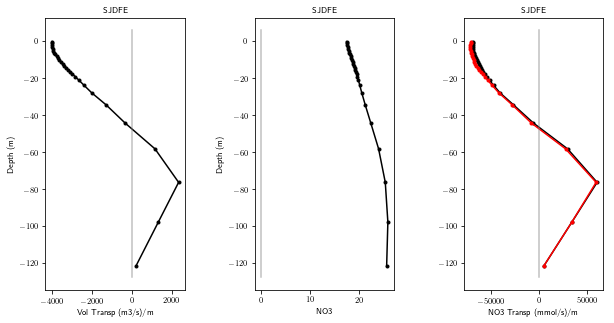

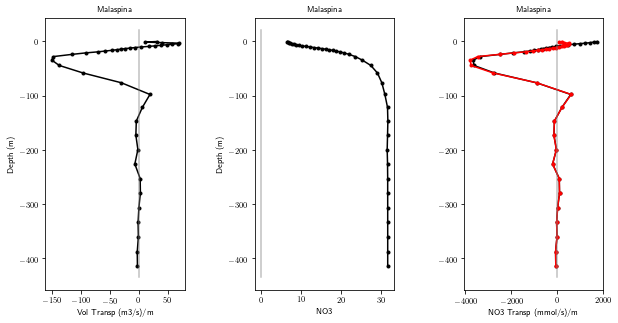

In [10]:
# plot 2015 transps, ulines
for ipath in ulines.keys():
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    fig,ax=plt.subplots(1,3,figsize=(10,5)); fig.subplots_adjust(wspace=.5)
    vmean=np.mean(np.sum(volT[ipath],2),0)
    nmean=np.mean(np.mean(np.ma.masked_where(imask==0,no3[ipath]),2),0)
    ax[0].plot(vmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[0].set_title(ipath); ax[0].set_xlabel('Vol Transp (m3/s)/m'); ax[0].set_ylabel('Depth (m)')
    yl=ax[0].get_ylim(); ax[0].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[0].set_ylim(-450,0)
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    ax[1].plot(nmean,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[1].set_title(ipath); ax[1].set_xlabel('NO3'); ax[1].set_ylabel('Depth (m)')
    ax[1].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)
    ax[2].plot(np.mean(np.sum(no3T[ipath],2),0)/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')#*1e-3*62.0049*1e-3
    ax[2].plot(vmean*nmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'r.-')
    ax[2].set_title(ipath); ax[2].set_xlabel('NO3 Transp (mmol/s)/m'); ax[1].set_ylabel('Depth (m)')
    ax[2].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)

2.885988669662497 kmol/s
[     0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.         301238.72685964 723654.36264338 855627.64583225
 692050.85637071 313417.07795651      0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.        ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         19.95870258 22.81323256 24.64073198 25.70331479 26.28684983
  0.          0.          0.          0.          0.   

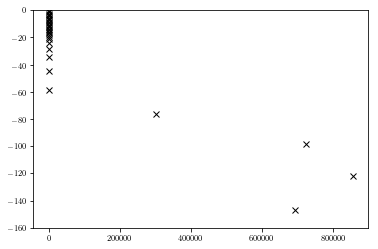

In [11]:
ipath='SJDFK'
transp=np.mean(np.sum(no3T[ipath],2),0)#*1e-3*62.0049*1e-3
plt.plot(np.where(transp>0,transp,0),-1*gdept_1d,'kx')
plt.ylim(-160,0)
print(np.sum(np.where(transp>0,transp,0))*1e-6,'kmol/s')
print(np.where(transp>0,transp,0))
print(np.where(transp>0,e3t_1d,0))

In [12]:
# sum 2015 transps, vlines
print('Vol')
for ipath in vlines.keys():
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    print(ipath,'North:',np.sum((volTProf>0)*volTProf),'South:',np.sum((volTProf<0)*volTProf), 'm3/s')
print('NO3')
for ipath in vlines.keys():
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    print(ipath,'North:',np.sum((no3TProf>0)*no3TProf)*1e-6,'South:',np.sum((no3TProf<0)*no3TProf)*1e-6, 'kmol/s')

Vol
Haro North: 78104.95186049995 South: -59402.52409263601 m3/s
SJC North: 132.46022152328547 South: -5025.018980844677 m3/s
Rosario North: 599.0568677447447 South: -24194.516159854757 m3/s
Discovery North: 2941.6799860247193 South: -5089.7342934741855 m3/s
Sutil North: 14725.477616211156 South: -11159.473570323338 m3/s
NO3
Haro North: 1.8329547062743314 South: -1.0866783779716842 kmol/s
SJC North: 0.0031250973620876575 South: -0.08639185117787615 kmol/s
Rosario North: 0.013704832693478256 South: -0.38476131684419823 kmol/s
Discovery North: 0.03574674749048486 South: -0.08296770860937229 kmol/s
Sutil North: 0.42432691430539743 South: -0.26200858731723764 kmol/s


In [13]:
# sum 2015 transps, ulines
print('Vol')
for ipath in ulines.keys():
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    print(ipath,'East:',np.sum((volTProf>0)*volTProf),'West:',np.sum((volTProf<0)*volTProf), 'm3/s')
print('NO3')
for ipath in ulines.keys():
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    print(ipath,'East:',np.sum((no3TProf>0)*no3TProf)*1e-6,'West:',np.sum((no3TProf<0)*no3TProf)*1e-6, 'kmol/s')

Vol
SJDFK East: 102705.18723350498 West: -114031.58614629017 m3/s
SJDFW East: 94202.31806757385 West: -105753.20350599197 m3/s
SJDFE East: 100107.93789149463 West: -111444.78473875945 m3/s
Malaspina East: 1184.405918984923 West: -7222.474042960213 m3/s
NO3
SJDFK East: 2.885988669662497 West: -2.257963861978615 kmol/s
SJDFW East: 2.782275243118285 West: -1.8320026070915805 kmol/s
SJDFE East: 2.5857277258702682 West: -2.0384479593890075 kmol/s
Malaspina East: 0.03217694877028667 West: -0.19069485801049252 kmol/s


In [14]:
for ipath in ('SJDFW','SJDFE'):
    print(ipath,'net vol:',np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3, '10^3 m3/s')

SJDFW net vol: -11.550885438418288 10^3 m3/s
SJDFE net vol: -11.33684684726487 10^3 m3/s


In [15]:
# into SOG from south:
volsum=0
for ipath in ('Haro','SJC','Rosario'):
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    volsum=volsum+np.sum((volTProf>0)*volTProf)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Haro','SJC','Rosario'):
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    no3sum=no3sum+np.sum((no3TProf>0)*no3TProf)*1e-6
print(no3sum,'kmol/s')
print('net:')
volsum=0
for ipath in ('Haro','SJC','Rosario'):
    volsum=volsum+np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Haro','SJC','Rosario'):
    no3sum=no3sum+np.mean(np.sum(np.sum(no3T[ipath],2),1),0)*1e-6
print(no3sum,'kmol/s')

78.83646894976799 10^3 m3/s
1.8497846363298973 kmol/s
net:
-9.78559028356744 10^3 m3/s
0.2919530903361427 kmol/s


In [16]:
# into SOG from north:
for ipath in ('Discovery','Sutil','Malaspina'):
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    volsum=volsum+np.sum((volTProf<0)*volTProf)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    no3sum=no3sum+np.sum((no3TProf<0)*no3TProf)*1e-6
print(no3sum,'kmol/s')
print('net:')
volsum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    volsum=volsum+np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    no3sum=no3sum+np.mean(np.sum(np.sum(no3T[ipath],2),1),0)*1e-6
print(no3sum,'kmol/s')

-33.25727219032518 10^3 m3/s
-0.5356711539371024 kmol/s
net:
-4.620118385536934 10^3 m3/s
-0.04342054337093376 kmol/s


In [17]:
# final calculation: strict about only including flow below zero crossings: does not alter southern calculations, only north; in fact does not alter north significantly
# into SOG from north:
no3sum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    if ipath=='Discovery':
        no3TProf=no3TProf[3:]
    no3sum=no3sum+np.sum((no3TProf<0)*no3TProf)*1e-6
print(no3sum,'kmol/s')

-0.5353172441842738 kmol/s


## unit conversions

In [18]:
### Kh2018:
# verify that units are kg N /s not kg NO3/s: 
# if you use molecular mass for N, you get back a reasonable mean nitrate concentration:
# 64 kg/s / (143*10^3 m3/s) * (1000 g/kg) / (62.0049 g/mol)*(10*3mmol/mol) = kg/s*s/m3*g/kg*mol/g*mmol/mol=mmol/m3 = ug/L
64/143/62.0049*10**3, 64/143/14.0067*10**3

(7.2180174075346875, 31.952740299460082)

In [19]:
# now convert SJDF flux of 61 kg/s to kmol/s:
# 61 kg/s  * (1000 g/kg) / (14.0067 g N/mol) *(1e-3 kmol/mol) = kmol/s
61/14.0067

4.355058650502974

In [20]:
# additional 3 kg/s from north (kmol/s):
3/14.0067 

0.21418321231981838

In [21]:
### unit conversion:
#Mackas and Harrison: 2600-2900 tonnes N/day JDFS deep estuarine circulation nitrate
# 1 tonne = 1e3 kg
#14.0067 g/mol N
2600*1e3/(24*3600)*1e3/14.0067 # mol/s

2148.4427161710173

In [22]:
2900*1e3/(24*3600)*1e3/14.0067

2396.339952652289

In [23]:
#net:
400*1e3/(24*3600)

4.62962962962963

In [24]:
600*1e3/(24*3600)

6.944444444444445

In [25]:
# Sutton annual influx of din by advection from pacific to SalishSea: 85300+/-55700 Mmol/yr
# and 69500+/-44200 Mmol/yr out
# kmol/s:

In [40]:
85300/(365.25*24*3600)*1e3,55700/(365.25*24*3600)*1e3

(2.7029938905366695, 1.7650264912414126)

In [27]:
# Sutton annual influx of din by advection from pacific to SoG: 29900+/-19500 Mmol/yr
# and 24300+/-15500 Mmol/yr out

In [28]:
# Mmol/yr *(1 yr /365 days)*(1 day / 24*3600 s) *1e6 = mol/s
29900/(365.25*24*3600)*1e6,19500/(365.25*24*3600)*1e6

(947.4738256394656, 617.9177123735645)

In [29]:
# Mmol/yr*1e6 mol/Mmol*62.0049 g/mol * 1yr/(365.25*24*3600 s)*1kg/(1e3g)=kg/s
29900*1e6*62.0049/(365.25*24*3600)*1e-3

58.7480198113925

In [30]:
# Mmol/yr*1e6 mol/Mmol*62.0049 g/mol * 1yr/(365.25*24*3600 s)*1kg/(1e3g)=kg/s
24300*1e6*62.0049/(365.25*24*3600)*1e-3

47.745046201232036

In [31]:
58.7480198113925-47.745046201232036

11.002973610160467

In [32]:
15500*1e6*62.0049/(365.25*24*3600)*1e-3

30.454659099551296

In [33]:
19500*1e6*62.0049/(365.25*24*3600)*1e-3

38.31392596395163

In [34]:
114/(60+38)

1.163265306122449

In [35]:
30*1.1632

34.896

In [36]:
for ipath in ('SJDFW','SJDFE'):
    print(ipath,'net vol:',np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3, '10^3 m3/s')

SJDFW net vol: -11.550885438418288 10^3 m3/s
SJDFE net vol: -11.33684684726487 10^3 m3/s


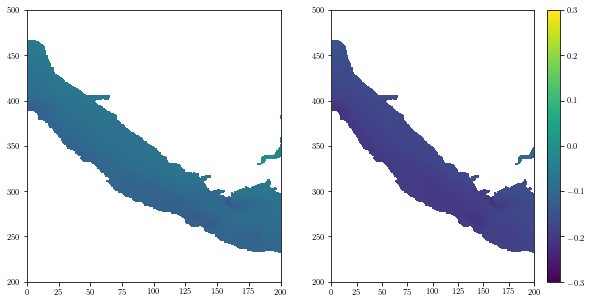

In [37]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,0,:,:]
    A=mesh.variables['e1t'][0,:,:]*mesh.variables['e2t'][0,:,:]
ax=axs[0]
with nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/01jan15/SalishSea_1d_20150101_20150101_grid_T.nc') as f:
    ax.pcolormesh(np.ma.masked_where(tmask==0,f.variables['sossheig'][0,:,:]),vmin=-.3,vmax=.3)
ax.set_xlim(0,200)
ax.set_ylim(200,500)
ax=axs[1]
with nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/01jan19/SalishSea_1d_20190101_20190101_grid_T.nc') as f:
    m=ax.pcolormesh(np.ma.masked_where(tmask==0,f.variables['sossheig'][0,:,:]),vmin=-.3,vmax=.3)
ax.set_xlim(0,200)
ax.set_ylim(200,500)
plt.colorbar(m)

In [38]:
np.sum(np.sum(tmask[200:500,:200]*A[200:500,:200]))

2967498913.7727942

In [39]:
# convert transport loss to ssh gain (m)
3e3*365.25*4*24*3600/np.sum(np.sum(tmask[200:500,:200]*A[200:500,:200]))

127.61291950012635